In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from CSV file
df = pd.read_csv('processed_dataset.csv')

In [5]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nSample of the dataset:")
print(df.head())

Dataset shape: (2901, 14)

Sample of the dataset:
    type                                               text  has_phone_number  \
0  Promo  জিঅ 5G গ্ৰাহকসকলৰ বাবে বিশেষ অফাৰ\nজিঅ এয়াৰফা...                 0   
1  Promo  জিঅ'ফাইবাৰে আপোনাক স্বাস্থ্য আৰু ফিট্নেছ এপসমূ...                 0   
2    Ham  299.0  টকাৰ ৰিচাৰ্জ সফল হৈছে!\nJio নম্বৰ : 700...                 1   
3  Promo  Jio 'ৰ সৈতে সংযুক্ত হৈ থাকক আৰু Jio 'ৰ বিশ্বমা...                 0   
4  promo  অতুলনীয় সেৱাৰ সৈতে ভাৰতৰ একমাত্ৰ প্ৰকৃত 5G নে...                 0   

   has_special_chars  has_all_caps_words  has_url  has_short_url  \
0                  1                   1        1              1   
1                  1                   0        1              0   
2                  1                   1        1              0   
3                  1                   0        0              0   
4                  1                   0        0              0   

   has_regular_url  is_mixed_language  has_currency  h

In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
type                  89
text                   0
has_phone_number       0
has_special_chars      0
has_all_caps_words     0
has_url                0
has_short_url          0
has_regular_url        0
is_mixed_language      0
has_currency           0
has_date               0
has_id_code            0
has_emoji              0
has_time               0
dtype: int64


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
type                  89
text                   0
has_phone_number       0
has_special_chars      0
has_all_caps_words     0
has_url                0
has_short_url          0
has_regular_url        0
is_mixed_language      0
has_currency           0
has_date               0
has_id_code            0
has_emoji              0
has_time               0
dtype: int64


In [8]:
# Check unique values in 'type' column
print("\nUnique values in 'type' column:")
print(df['type'].unique())


Unique values in 'type' column:
['Promo' 'Ham' 'promo' 'spam' 'spam ' 'ham' nan]


In [9]:
# Standardize the type values - treat case insensitively and NaN as spam
def standardize_type(x):
    if pd.isna(x):  # Handle NaN values as spam
        return 'spam'
    
    if not isinstance(x, str):
        x = str(x)  # Convert non-string types to string
    
    x_lower = x.lower().strip()
    
    # Exact match for main categories
    if 'spam' in x_lower:
        return 'spam'
    elif 'ham' in x_lower:
        return 'ham'
    elif 'promo' in x_lower:
        return 'promo'
    else:
        return x_lower  # Return as is for other categories

df['standardized_type'] = df['type'].apply(standardize_type)

In [10]:
# Display distribution of standardized types
print("\nStandardized type distribution:")
print(df['standardized_type'].value_counts())


Standardized type distribution:
standardized_type
spam     1653
ham      1238
promo      10
Name: count, dtype: int64


In [11]:
# Create a label encoder for the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['standardized_type'])


In [12]:
# Map the encoded values back to their original labels for reference
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nEncoded class mapping:")
for class_name, encoded_value in encoded_mapping.items():
    print(f"{class_name} -> {encoded_value}")



Encoded class mapping:
ham -> 0
promo -> 1
spam -> 2


In [13]:
# Define features (all columns except type-related and text columns)
features = [col for col in df.columns if col not in ['type', 'text', 'standardized_type', 'type_encoded']]
print("\nFeatures used for classification:")
print(features)



Features used for classification:
['has_phone_number', 'has_special_chars', 'has_all_caps_words', 'has_url', 'has_short_url', 'has_regular_url', 'is_mixed_language', 'has_currency', 'has_date', 'has_id_code', 'has_emoji', 'has_time']


In [14]:
# Prepare features and target
X = df[features]
y = df['type_encoded']

In [15]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



Training set size: 2320
Testing set size: 581


In [16]:
# Train Random Forest model
print("\nTraining Random Forest model...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



Training Random Forest model...


RandomForestClassifier(random_state=42)

In [17]:
# Evaluate model on training data
train_preds = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f"\nTraining accuracy: {train_accuracy:.3f}")



Training accuracy: 0.739


In [18]:
# Evaluate model on test data
test_preds = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test accuracy: {test_accuracy:.3f}")


Test accuracy: 0.707


In [19]:
# Get the original class names for display
original_class_names = label_encoder.classes_


In [20]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, test_preds, target_names=original_class_names))



Classification Report:
              precision    recall  f1-score   support

         ham       0.76      0.47      0.58       248
       promo       0.00      0.00      0.00         2
        spam       0.69      0.89      0.78       331

    accuracy                           0.71       581
   macro avg       0.48      0.45      0.45       581
weighted avg       0.72      0.71      0.69       581



C:\Users\VivoBook S 15 (2022)\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VivoBook S 15 (2022)\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VivoBook S 15 (2022)\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c


Confusion matrix saved as 'confusion_matrix_multiclass.png'


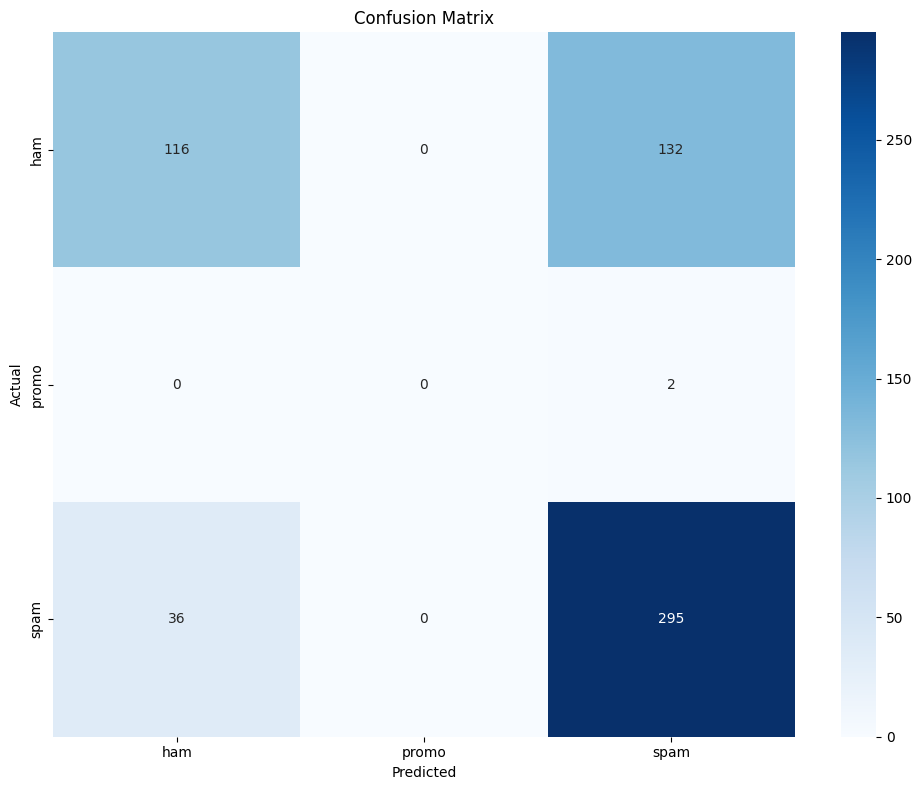

In [21]:
# Display confusion matrix
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=original_class_names,
            yticklabels=original_class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix_multiclass.png')
print("\nConfusion matrix saved as 'confusion_matrix_multiclass.png'")


Feature importance plot saved as 'feature_importance_multiclass.png'


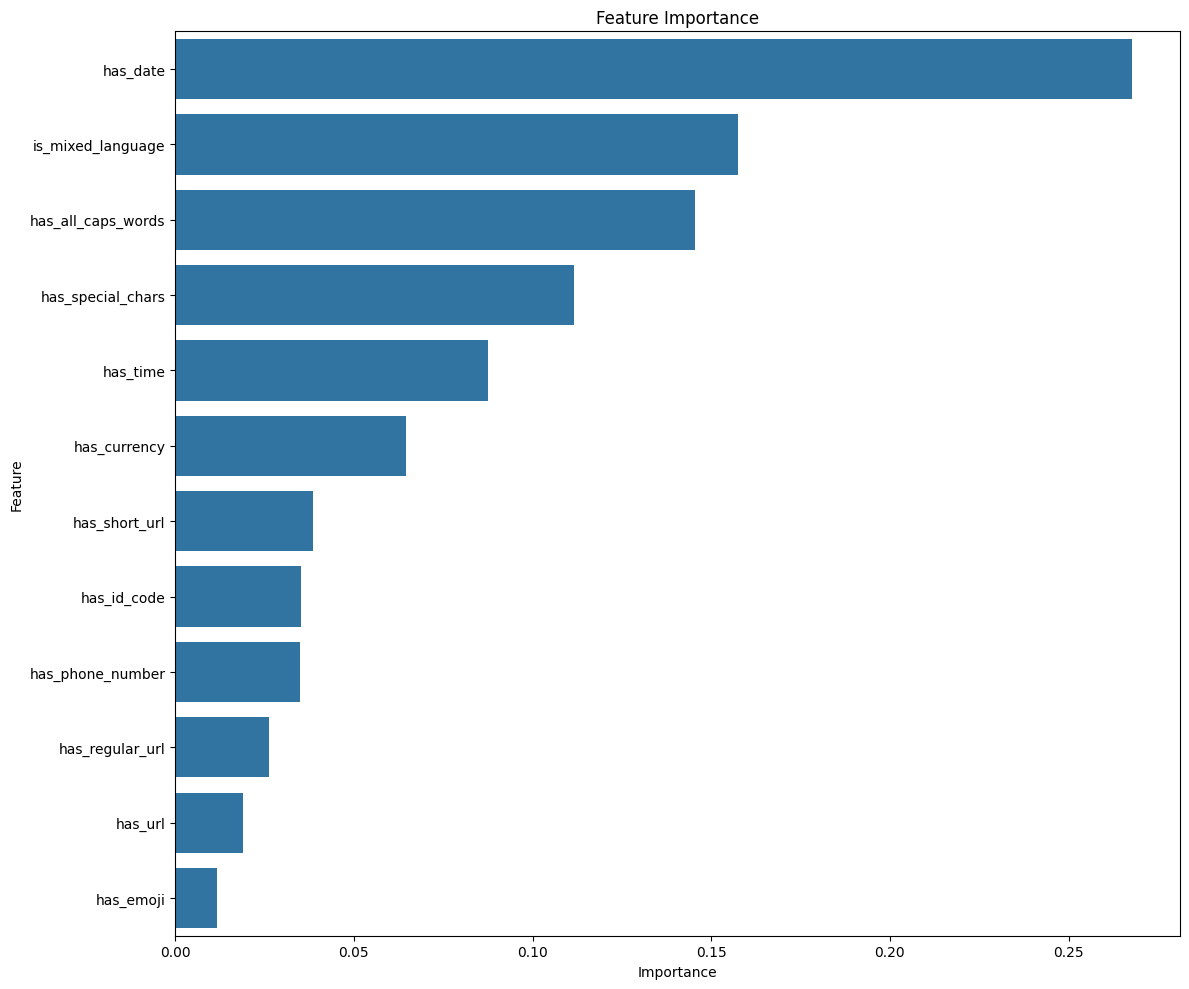

In [22]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance_multiclass.png')
print("Feature importance plot saved as 'feature_importance_multiclass.png'")


In [23]:
# Display top 5 most important features
print("\nTop 5 most important features:")
print(feature_importance.head(5))



Top 5 most important features:
               Feature  Importance
8             has_date    0.267813
6    is_mixed_language    0.157494
2   has_all_caps_words    0.145414
1    has_special_chars    0.111539
11            has_time    0.087652


In [33]:
def tune_hyperparameters():
    print("\nPerforming hyperparameter tuning...")
    from sklearn.model_selection import GridSearchCV
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )
    
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.3f}")
    
    # Train with best parameters
    best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
    best_rf.fit(X_train, y_train)
    
    # Evaluate
    best_preds = best_rf.predict(X_test)
    best_accuracy = accuracy_score(y_test, best_preds)
    print(f"Tuned model test accuracy: {best_accuracy:.3f}")
    
    return best_rf

In [34]:
# Save the model and label encoder
import pickle
with open('message_classifier_model.pkl', 'wb') as file:
    pickle.dump({'model': rf, 'label_encoder': label_encoder, 'features': features}, file)
print("\nModel saved as 'message_classifier_model.pkl'")



Model saved as 'message_classifier_model.pkl'


In [35]:
# Function to make predictions on new data
def predict_message_type(model_data, new_data):
    # Extract model components
    model = model_data['model']
    label_encoder = model_data['label_encoder']
    features = model_data['features']
    
    # Ensure new_data has the same features as training data
    needed_features = [f for f in features if f in new_data.columns]
    missing_features = [f for f in features if f not in new_data.columns]
    
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        for feature in missing_features:
            new_data[feature] = 0  # Add missing features with default values
    
    new_data_features = new_data[features]
    
    # Make predictions
    predictions_encoded = model.predict(new_data_features)
    predictions = label_encoder.inverse_transform(predictions_encoded)
    
    # Get probabilities for each class
    probabilities = model.predict_proba(new_data_features)
    
    # Create results DataFrame
    results = pd.DataFrame({
        'Predicted_Type': predictions
    })
    
    # Add probability columns for each class
    for i, class_name in enumerate(label_encoder.classes_):
        results[f'{class_name}_Probability'] = probabilities[:, i]
    
    return results

In [36]:
print("\nModel training and evaluation complete!")
print("To use this model for predictions:")
print("1. Load the model: model_data = pickle.load(open('message_classifier_model.pkl', 'rb'))")
print("2. Call: predict_message_type(model_data, new_data)")



Model training and evaluation complete!
To use this model for predictions:
1. Load the model: model_data = pickle.load(open('message_classifier_model.pkl', 'rb'))
2. Call: predict_message_type(model_data, new_data)


In [37]:
# Add a simple test prediction example
print("\nExample prediction code:")
print("import pickle")
print("model_data = pickle.load(open('message_classifier_model.pkl', 'rb'))")
print("# Create a sample input with same columns as the training data")
print("sample_data = pd.DataFrame({")
print("    'has_phone_number': [1, 0, 0],")
print("    'has_special_chars': [1, 1, 1],")
print("    # Add other features...")
print("})")
print("predictions = predict_message_type(model_data, sample_data)")
print("print(predictions)")


Example prediction code:
import pickle
model_data = pickle.load(open('message_classifier_model.pkl', 'rb'))
# Create a sample input with same columns as the training data
sample_data = pd.DataFrame({
    'has_phone_number': [1, 0, 0],
    'has_special_chars': [1, 1, 1],
    # Add other features...
})
predictions = predict_message_type(model_data, sample_data)
print(predictions)
